# **📌DATA SCHOOL PROJECT06**  
**┗ 고객 Segmentation을 위한 RFM·Cohort 분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 분석 프로세스 (Process)
* 주요 결과 (Results)
* 기대 효과 및 시사점 (Implications)

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 고객 Segmentation을 위한 RFM·Cohort 분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA · 고객 세분화 (Segmentation) · 인사이트 도출
```

> **학습목표**

```
▶ 고객 데이터를 전처리·탐색(EDA)하고 지표를 정의하는 역량 습득
▶ RFM 기반 고객 Segmentation 개념과 K-means 군집화 적용 경험
▶ Cohort 분석을 통해 고객 잔존율(리텐션) 패턴을 파악하는 역량 습득
▶ 분석 결과를 비즈니스 전략 제안으로 연결하는 실전형 분석 능력 강화
```

## **문제상황 Introduction**
---

> **시나리오**  

```
A사는 글로벌 오픈마켓 플랫폼을 운영한다.  
런칭 초기에는 고객 수가 빠르게 증가했지만, 이후 서비스 이용이 정체·감소세를 보이며  
영업이익과 고객 유지율에 리스크가 발생하고 있다.

```  

> **문제정의**

```
▶ 고객 이용 수준 및 매출 기여도의 불균형 구조 파악 필요
▶ 특정 소수 VIP 고객에 과도하게 의존하는 위험 구조 확인
▶ 신규/저관여 고객 이탈률이 높아 장기 성장성 저해
```  

> **해결방안**

```
▶ 거래 데이터를 기반으로 RFM 지표 정의 (Recency·Frequency·Monetary)
▶ Rule-based 등급화 vs K-means 클러스터링 비교 분석
▶ Cohort 분석을 통한 고객 잔존율·재구매 패턴 탐색
▶ 세분화 결과 기반 맞춤형 CRM/마케팅 전략 제안
```

> **성과측정**  

```
▶ RFM Score 기반 고객 충성도·매출 기여도 분석
▶ K-means 군집 결과로 Normal 그룹의 세부 행동 특성 발견
▶ Cohort 분석을 통한 초기 이탈·재활성화 패턴 시각화
```

> **기대효과**

```
▶ 충성 고객 리텐션 강화 → 핵심 매출 유지
▶ 신규/저관여 고객의 재구매·활성화 전략 도출 → 모수 확대
▶ 휴면/이탈 고객 관리 효율화 → 비용 최적화
```

> **데이터 살펴보기**

* 이커머스 온라인 구매 데이터
* 데이터 명세 ⬇

|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|송장번호|재고코드|상세설명|수량|송장날짜|개당가격|고객ID|나라|




In [90]:
# pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


In [91]:
# Data read
df=pd.read_csv('./data/S_PJT06_DATA_rfm.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔈Process01**  
**┗ 서비스 이용형태 탐색**  
---

### 🔶 Data 전처리  
---
- Null/Outlier 처리 → 음수 Quantity / UnitPrice 제거
- CustomerID 기반 중복·결측 처리


In [92]:
# Data 형태 확인
# 541,909 row, 8 col로 구성됨
print('df', df.shape)

df (541909, 8)


In [93]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [94]:
# Null 값 확인
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [95]:
# Outlier 확인
df.describe()

# quantity, unitprice -> min 값이 - 값 , outliar 가능성 높음

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [96]:
# CustomerID 기준으로 Null value drop

df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


<Axes: xlabel='Quantity', ylabel='Density'>

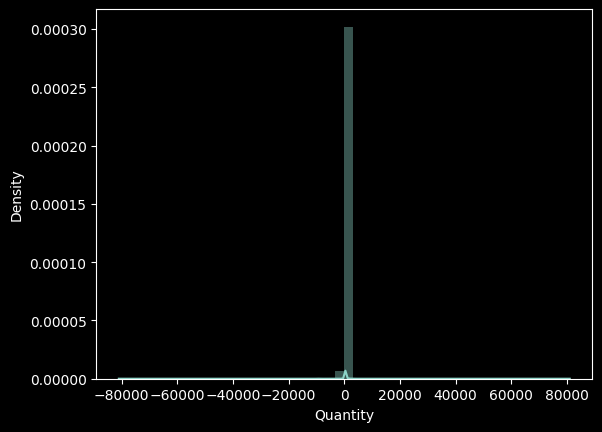

In [97]:
# distplot 활용 음수 데이터 분포 확인 (quantity, unitprice)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])

sns.distplot(df['Quantity']) # - 8만까지 확인 가능

In [98]:
# UniPrice 음수값 제거
df = df[df['UnitPrice']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [99]:
# Quantity 음수값 제거
df = df[df['Quantity']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [100]:
# 행개수 (541909 -> 397884)
df.shape

(397884, 8)

In [101]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [102]:
# 이용 고객수(4,338명), 이용품목건수(5,167,812건), 이용 나라(37개국),
df['CustomerID'].nunique(), df['Quantity'].sum(), df['Country'].nunique()

(4338, np.int64(5167812), 37)

In [103]:
# 고객 1명이 평균 몇 건의 주문을 했는지 중복 제거된 실제 구매건수로 계산

df.groupby('CustomerID')['InvoiceNo'].nunique().mean()

np.float64(4.272014753342554)

## **🔉Process02**  
**┗ 지표 기획 및 데이터 추출**  
---

▶︎ KPI 정의

- 고객 수: CustomerID 기준 unique count
- 주문 수: InvoiceNo 기준 unique count
- 매출액: UnitPrice × Quantity 합계
- RFM 지표: 고객 가치 평가를 위한 3가지 핵심 지표

| 항목        | 정의                           |
| --------- | ---------------------------- |
| Recency   | 최근에 구매한 지 얼마나 되었나? (작을수록 최근) |
| Frequency | 얼마나 자주 구매했나? (구매 횟수)         |
| Monetary  | 총 얼마나 돈을 썼나? (총 구매 금액)       |



### 🔶 Recency(최근성)
---

### ▶ Recency 인사이트
- 고객 분포가 **최근 구매자 vs 장기 미구매자**로 양극화  
- 최근 30일 이내 고객이 전체의 **38%** 차지 → 핵심 충성 고객층  
- 장기 미구매 고객(150일 이상) **24%** 존재 → **휴면 고객 관리 필요**


In [104]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [105]:
# split 사용해서 송장 데이터에 날짜 데이터만 추출하기 (시간 제외)
df['InvoiceDate'].str.split(' ').str[0]


,InvoiceDate
0,12/1/2010
1,12/1/2010
2,12/1/2010
3,12/1/2010
4,12/1/2010
...,...
541904,12/9/2011
541905,12/9/2011
541906,12/9/2011
541907,12/9/2011


In [106]:
# Datatime index (date 컬럼 생성)
import pandas as pd
df['Date'] = pd.to_datetime(df['InvoiceDate'].str.split(' ').str[0])
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [107]:
df['Date'].min(), df['Date'].max()


(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [108]:
# 고객ID별 가장 마지막 구매일
recency_df = df.groupby('CustomerID',as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()


,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [109]:
# 고객의 가장 마지막 구매일로 부터 며칠이 지났는지를 계산하기 위함
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (df['Date'].max() - x).days)

recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [110]:
recency_df.head(5)
# 12347.0이 12346.0	보다 충성고객으로 봄 -> 분석 시작 날짜 기준으로 각 고객이 며칠전에 구매를 했는지 확인 가능

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [111]:
recency_df.shape

(4338, 2)

In [112]:
recency_df['Recency'].describe()
# min, max, 25%, 50%, 75% 확인


,Recency
count,4338.000000
mean,92.059474
std,100.012264
min,0.000000
25%,17.000000
50%,50.000000
75%,141.750000
max,373.000000


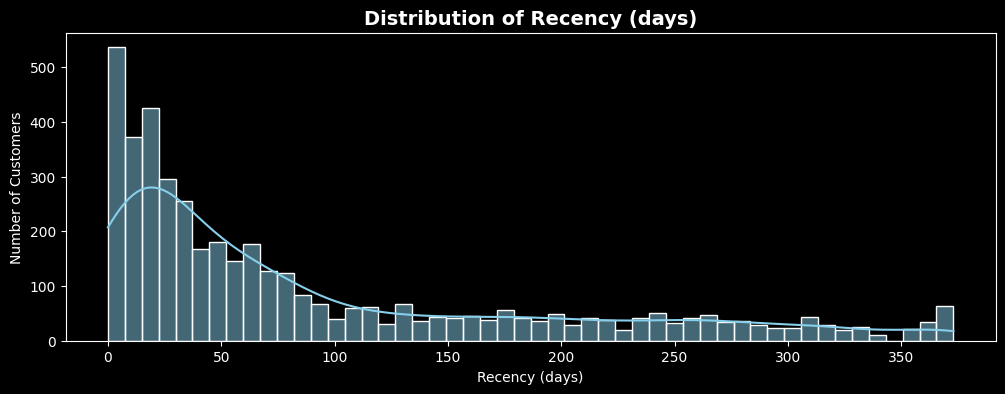

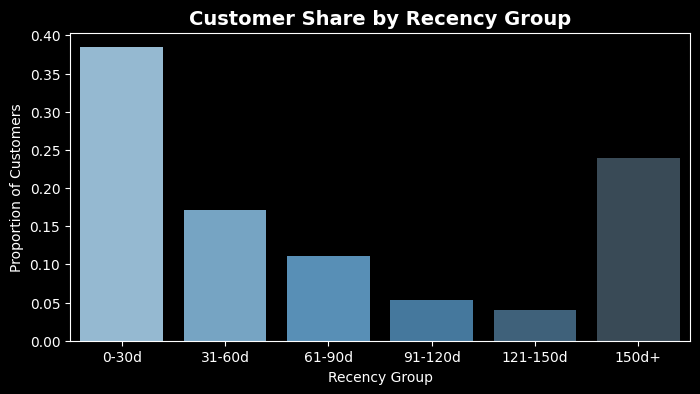

,RecencyGroup,Percent
0,0-30d,38.4
1,31-60d,17.1
2,61-90d,11.0
3,91-120d,5.4
4,121-150d,4.1
5,150d+,24.0


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

# Recency 분포 (히스토그램 + KDE)
plt.figure(figsize=(12,4))
sns.histplot(recency_df['Recency'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Recency (days)", fontsize=14, fontweight='bold')
plt.xlabel("Recency (days)")
plt.ylabel("Number of Customers")
plt.show()

# Recency 구간별 고객 비율 (0-30, 31-60, 61-90, 90일+)
bins = [0, 30, 60, 90, 120, 150, recency_df['Recency'].max()]
labels = ['0-30d','31-60d','61-90d','91-120d','121-150d','150d+']
recency_df['RecencyGroup'] = pd.cut(recency_df['Recency'], bins=bins, labels=labels, include_lowest=True)

# 구간별 비율 계산
recency_share = recency_df['RecencyGroup'].value_counts(normalize=True).sort_index()
recency_table = (recency_share * 100).round(1).reset_index()
recency_table.columns = ['RecencyGroup','Percent']

# --- 그래프 ---
plt.figure(figsize=(8,4))
sns.barplot(x=recency_share.index, y=recency_share.values, palette="Blues_d")
plt.title("Customer Share by Recency Group", fontsize=14, fontweight='bold')
plt.ylabel("Proportion of Customers")
plt.xlabel("Recency Group")
plt.show()

# --- 표 출력 ---
display(recency_table)


### 🔶 Frequency(최빈성)
---
### ▶ Frequency 인사이트
- 고객의 구매 횟수는 대부분 **1~3회**에 집중  
- **소수 충성 고객(상위 1%)**은 30회 이상 반복 구매 → 매출 핵심 견인  
- 구조적으로 **대부분 저빈도 고객 + 일부 고빈도 고객**으로 불균형

In [114]:
# Customer ID당 유니크한 Invoice를 1개의 주문건으로 인식하여 얼마나 자주 구매하고 있는지를 파악
# 한사람이 여러개의 송장번호를 가지고 있으면 여러번 주문한 것으로 봄 (12347.0	 -> 7개의 송장번호를 가지고 있음) -> drop_duplicates 필요
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True)
frequency_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom,2010-12-01


In [115]:
print('frequency_df', df.shape)

frequency_df (397884, 9)


In [116]:
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()

frequency_df.columns = ['CustomerID','Frequency'] # 컬럼 이름 변경
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


,Frequency
count,4338.000000
mean,4.272015
std,7.697998
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
90%,9.000000
95%,13.000000
99%,30.000000


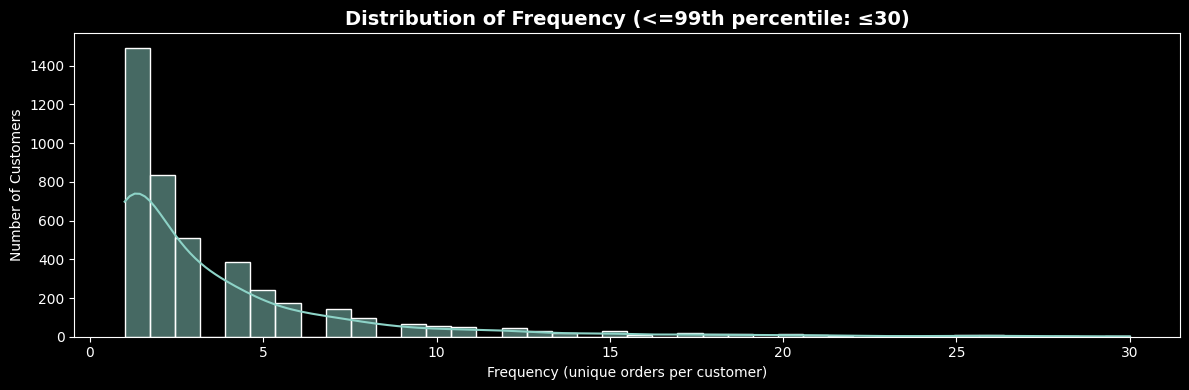

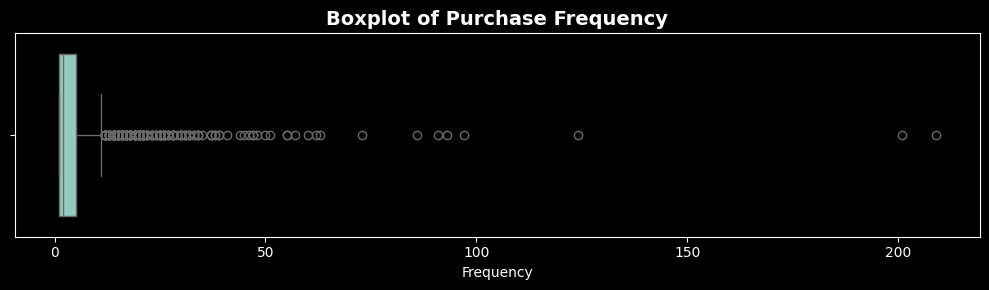

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# 기초 통계치 출력
freq_stats = frequency_df['Frequency'].describe(percentiles=[.25, .5, .75, .9, .95, .99])
display(freq_stats)

# 히스토그램 (상위 1% 컷)
freq_q99 = frequency_df['Frequency'].quantile(0.99)  # 상위 1% 컷
plt.figure(figsize=(12,4))
sns.histplot(
    data=frequency_df[frequency_df['Frequency'] <= freq_q99],
    x='Frequency',
    bins=40,
    kde=True
)
plt.title(f"Distribution of Frequency (<=99th percentile: ≤{int(freq_q99)})",
          fontsize=14, fontweight='bold')
plt.xlabel("Frequency (unique orders per customer)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# 박스플롯
plt.figure(figsize=(10,3))
sns.boxplot(data=frequency_df, x='Frequency')
plt.title("Boxplot of Purchase Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


### 🔶 Monetary(금액)
---

### ▶ Monetary 인사이트
- 고객 지출액은 **long-tail 분포** (소수 고액 고객이 평균을 끌어올림)  
- 상위 1% 고객은 **20,000 이상 지출**, 매출 기여도 매우 큼  
- **다수 저액 고객 vs 소수 고액 고객**의 전형적인 파레토 구조(20:80 법칙) 확인

In [118]:
# 구매금액 = 구매개수 * 구매단가 (customer id마다 얼마만큼 구매를 했는지 확인)
df['Total_cost'] = df['UnitPrice'] * df['Quantity'] # total cost라는 컬럼 생성
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [119]:
monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [120]:
monetary_df.shape

(4338, 2)

,Monetary
count,4338.000000
mean,2054.266460
std,8989.230441
min,3.750000
25%,307.415000
50%,674.485000
75%,1661.740000
90%,3646.531000
95%,5841.843000
99%,19880.995700


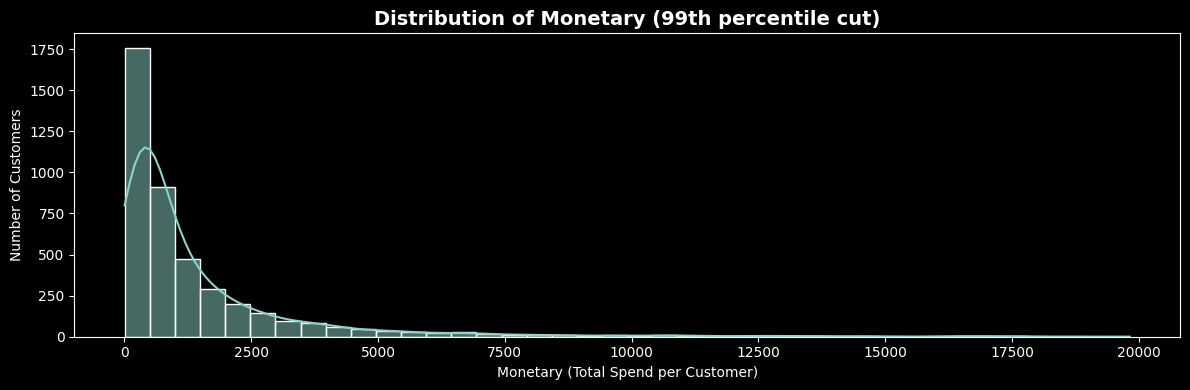

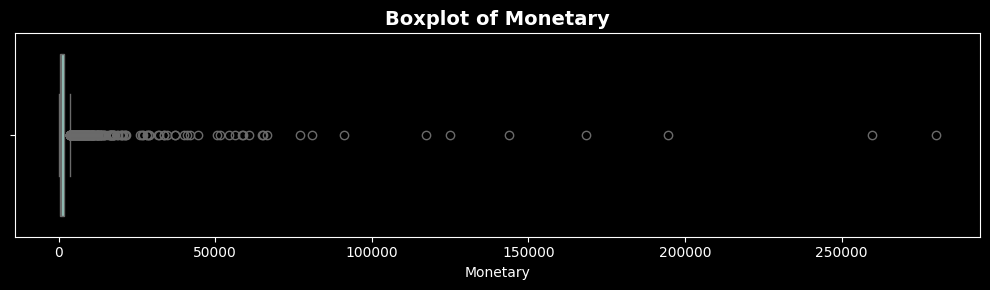

In [121]:
# Monetary 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 기초 통계치 출력
Mone_stats = monetary_df['Monetary'].describe(percentiles=[.25, .5, .75, .9, .95, .99])
display(Mone_stats)

# 상위 1% 컷 적용 (이상치 제거 후 분포 확인)
mon_q99 = monetary_df['Monetary'].quantile(0.99)

# 히스토그램
plt.figure(figsize=(12,4))
sns.histplot(data=monetary_df[monetary_df['Monetary'] <= mon_q99],
             x='Monetary', bins=40, kde=True)
plt.title("Distribution of Monetary (99th percentile cut)", fontsize=14, fontweight='bold')
plt.xlabel("Monetary (Total Spend per Customer)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# 박스플롯
plt.figure(figsize=(10,3))
sns.boxplot(data=monetary_df, x='Monetary')
plt.title("Boxplot of Monetary", fontsize=14, fontweight='bold')
plt.xlabel("Monetary")
plt.tight_layout()
plt.show()


In [122]:
# Data merge

# recency and frequency
rf = recency_df.merge(frequency_df,how='left',on='CustomerID')

# monetary

rfm = rf.merge(monetary_df,how='left',on='CustomerID')

rfm.head(5)

,CustomerID,Recency,RecencyGroup,Frequency,Monetary
0,12346.0,325,150d+,1,77183.60
1,12347.0,2,0-30d,7,4310.00
2,12348.0,75,61-90d,4,1797.24
3,12349.0,18,0-30d,1,1757.55
4,12350.0,310,150d+,1,334.40


In [123]:
rfm.shape

(4338, 5)

## **🔊Process03**  
**┗ RFM 활용 서비스 이용 수준 측정**  
---
### · 분석 흐름
1. **Scaling & Score 산출**  
   - RFM 지표 간 크기 차이(스케일)를 맞추어 공정하게 비교  
   - Recency·Frequency·Monetary를 동일 가중치로 합산 → 0~100 점수화  

2. **Grading (등급화)**  
   - 점수를 기준으로 고객을 5개 그룹으로 분류 (01.Very Strong ~ 05.Very Weak)  

3. **등급별 기여도 분석**  
   - 그룹별 고객 수·매출 기여율 비교 및 시각화 → VIP 의존 구조 확인  



### 🔶 Scaling & Score 산출
---

- R/F/M 지표를 min-max scaling으로 정규화
- Recency는 낮을수록 좋으므로 (1 – 정규화값)으로 변환
- 세 지표를 동일 가중치 합산 → 0~100 점수화

In [124]:
# Min max scale = 최대값을 1, 최소값을 0으로 표준화하는 기법
from sklearn.preprocessing import minmax_scale

In [125]:
# 최근성은 숫자가 작을수록, 즉 최근 구매일이 얼마 지나지 않은 고객이 더 점수가 높음
rfm['Recency'] = minmax_scale(rfm['Recency'], axis=0, copy=True)
rfm['Recency'] = 1-rfm['Recency'] # 값이 작을수록 높은 점수로 바꾸는 것

rfm['Frequency'] = minmax_scale(rfm['Frequency'], axis=0, copy=True)

rfm['Monetary'] = minmax_scale(rfm['Monetary'], axis=0, copy=True)

In [126]:
# Score
rfm['Score']=rfm['Recency']+rfm['Frequency']+rfm['Monetary']
# 각 항목마다 가중치는 같고, 총 점수는 0 ~ 3 사이가 될 것


# Score scaling 100 socre
rfm

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Score
0,12346.0,0.128686,150d+,0.000000,0.275443,0.404130
1,12347.0,0.994638,0-30d,0.028846,0.015368,1.038853
2,12348.0,0.798928,61-90d,0.014423,0.006401,0.819751
3,12349.0,0.951743,0-30d,0.000000,0.006259,0.958002
4,12350.0,0.168901,150d+,0.000000,0.001180,0.170081
...,...,...,...,...,...,...
4333,18280.0,0.257373,150d+,0.000000,0.000631,0.258004
4334,18281.0,0.517426,150d+,0.000000,0.000275,0.517701
4335,18282.0,0.981233,0-30d,0.004808,0.000622,0.986663
4336,18283.0,0.991957,0-30d,0.072115,0.007463,1.071535


In [127]:
# 100점을 곱해서 100점 만점으로 scaling
rfm['Score']=minmax_scale(rfm['Score'], axis=0, copy=True)*100
rfm['Score']=round(rfm['Score'],0)

In [128]:
rfm.head(5)

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Score
0,12346.0,0.128686,150d+,0.000000,0.275443,16.0
1,12347.0,0.994638,0-30d,0.028846,0.015368,42.0
2,12348.0,0.798928,61-90d,0.014423,0.006401,33.0
3,12349.0,0.951743,0-30d,0.000000,0.006259,39.0
4,12350.0,0.168901,150d+,0.000000,0.001180,7.0


### 🔶 Grade(점수) 구간화
---
- Score 기준 5등급 (Very Strong ~ Very Weak) 분류
- 단순하고 직관적 해석 가능

※ 참고: 본 프로젝트에서는 단순화를 위해 점수 기반 임계값(60/40/20)을 사용했으나,  
실무에서는 사분위(Quartile) 기반 구간화나 도메인 규칙(예: 90일 미구매=휴면)을 적용하는 것이 더 적합합니다.


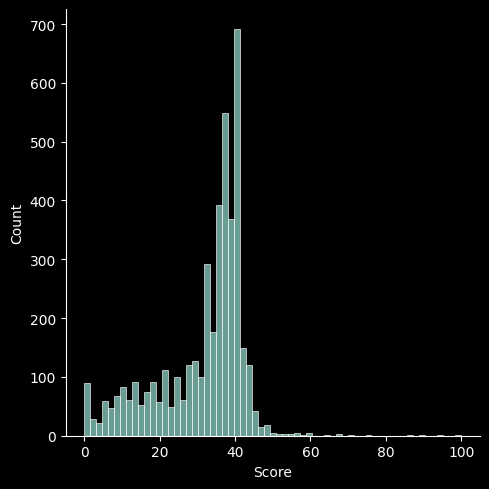

In [129]:
sns.displot(rfm['Score']);


In [130]:
rfm.head(5)

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Score
0,12346.0,0.128686,150d+,0.000000,0.275443,16.0
1,12347.0,0.994638,0-30d,0.028846,0.015368,42.0
2,12348.0,0.798928,61-90d,0.014423,0.006401,33.0
3,12349.0,0.951743,0-30d,0.000000,0.006259,39.0
4,12350.0,0.168901,150d+,0.000000,0.001180,7.0


In [131]:
# ▶ 점수별로 고객의 등급을 부여
# 60점 이상 Very storong
# 40~60점 Storng
# 20~40점 Normal
# 10~20점 Weak
# 0~10점 Very Weak

rfm['Grade'] = rfm['Score'].apply(lambda x : '01.Very Strong' if x>=60 else
                                  ('02.Strong' if x>=40 else
                                   ('03.Normal' if x>=20 else
                                    ('04.Weak' if x>=10 else '05.Very Weak'))))
rfm.head(5)

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Score,Grade
0,12346.0,0.128686,150d+,0.000000,0.275443,16.0,04.Weak
1,12347.0,0.994638,0-30d,0.028846,0.015368,42.0,02.Strong
2,12348.0,0.798928,61-90d,0.014423,0.006401,33.0,03.Normal
3,12349.0,0.951743,0-30d,0.000000,0.006259,39.0,03.Normal
4,12350.0,0.168901,150d+,0.000000,0.001180,7.0,05.Very Weak


### 🔶 등급별 기여도 분석
---

- Grade별 고객 수, 총 매출, 평균 매출, 매출 기여율을 집계하여 표로 요약
- 고객 수 비중 vs 매출 기여율을 비교하는 막대그래프
- 매출 기여율을 직관적으로 보여주는 파이차트



In [132]:
rfm.groupby('Grade')['CustomerID'].count()

,CustomerID
Grade,
01.Very Strong,13
02.Strong,1056
03.Normal,2503
04.Weak,453
05.Very Weak,313


In [133]:
# 등급별 고객 수 & 매출 기여율 요약
grade_summary = (
    rfm.groupby('Grade')
       .agg(
           NumCustomers=('CustomerID', 'count'),
           TotalSales=('Monetary', 'sum'),
           AvgSales=('Monetary', 'mean')
       )
       .reset_index()
)

# 전체 매출 대비 비중 계산
total_sales = grade_summary['TotalSales'].sum()
grade_summary['SalesShare(%)'] = (grade_summary['TotalSales'] / total_sales * 100).round(1)

# 등급 순서 정렬 (VIP → Very Weak 순서)
grade_order = ['01.Very Strong','02.Strong','03.Normal','04.Weak','05.Very Weak']
grade_summary['Grade'] = pd.Categorical(grade_summary['Grade'], categories=grade_order, ordered=True)
grade_summary = grade_summary.sort_values('Grade')

grade_summary


,Grade,NumCustomers,TotalSales,AvgSales,SalesShare(%)
0,01.Very Strong,13,5.626091,0.432776,17.7
1,02.Strong,1056,15.514897,0.014692,48.9
2,03.Normal,2503,9.121725,0.003644,28.7
3,04.Weak,453,1.052876,0.002324,3.3
4,05.Very Weak,313,0.429837,0.001373,1.4


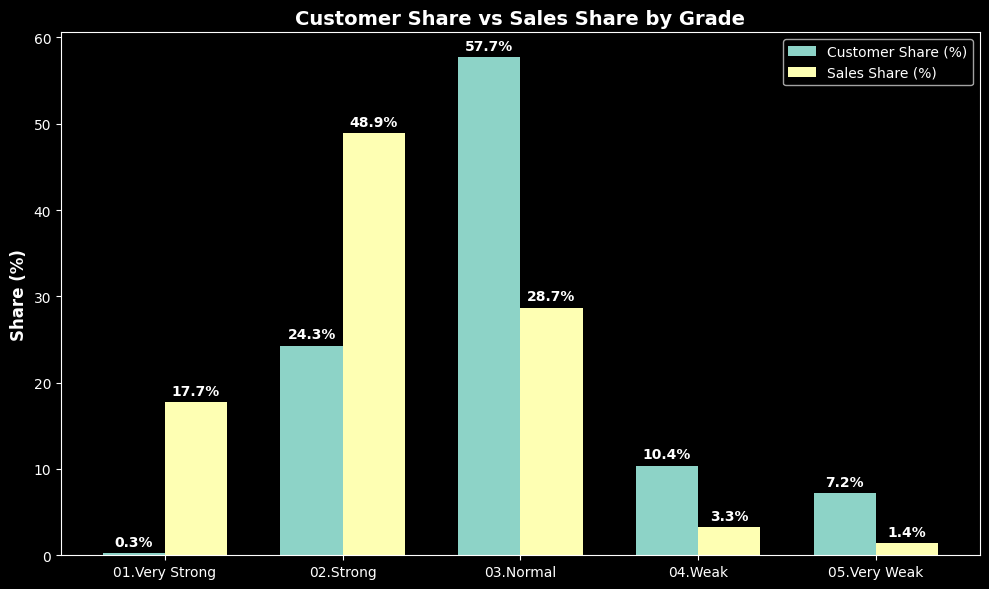

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# 고객 수 비중 & 매출 비중 데이터 준비
grade_summary['CustomerShare(%)'] = (grade_summary['NumCustomers'] / grade_summary['NumCustomers'].sum() * 100).round(1)

x = np.arange(len(grade_summary['Grade']))  # 등급 위치
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(10,6))

# 고객 수 비중
bars1 = ax.bar(x - width/2, grade_summary['CustomerShare(%)'], width, label='Customer Share (%)')
# 매출 비중
bars2 = ax.bar(x + width/2, grade_summary['SalesShare(%)'], width, label='Sales Share (%)')

# 레이블/제목
ax.set_ylabel('Share (%)', fontsize=12, fontweight='bold')
ax.set_title('Customer Share vs Sales Share by Grade', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(grade_summary['Grade'], rotation=0)
ax.legend()

# 퍼센트 라벨 표시
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


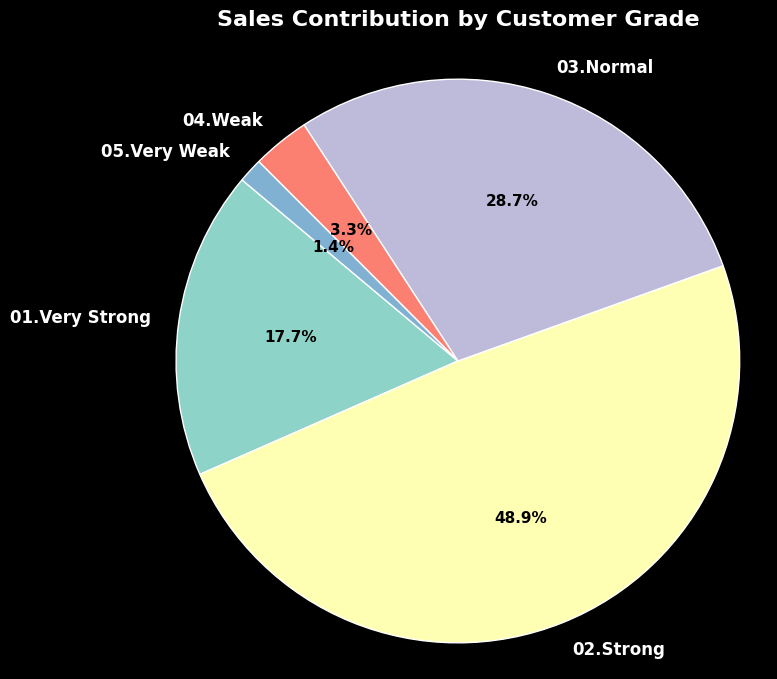

In [177]:
import matplotlib.pyplot as plt

# 등급별 매출 기여율 데이터
sales_share = grade_summary.set_index('Grade')['SalesShare(%)']

# 파이차트
plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors

wedges, texts, autotexts = plt.pie(
    sales_share,
    labels=sales_share.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)


plt.setp(texts, size=12, weight="bold") # 등급 라벨
plt.setp(autotexts, size=11, weight="bold", color="black")  # 퍼센트 값

# 원형 비율 맞추기
plt.axis('equal')

plt.title("Sales Contribution by Customer Grade", fontsize=16, fontweight='bold', pad=20)
plt.show()



### 🔶그래프 해석 & 인사이트

#### 1. Grade(점수) 구간화 결과
---

| Grade           | NumCustomers | TotalSales | AvgSales | SalesShare(%) |
|-----------------|--------------|------------|----------|---------------|
| 01.Very Strong  | 13           | 5.63       | 0.433    | 17.7%         |
| 02.Strong       | 1,056        | 15.51      | 0.015    | 48.9%         |
| 03.Normal       | 2,503        | 9.12       | 0.004    | 28.7%         |
| 04.Weak         | 453          | 1.05       | 0.002    | 3.3%          |
| 05.Very Weak    | 313          | 0.43       | 0.001    | 1.4%          |

- `NumCustomers`: 등급별 고객 수  
- `TotalSales`: 등급별 총 매출 (Monetary 합계)  
- `AvgSales`: 고객 1인당 평균 매출  
- `SalesShare(%)`: 전체 매출에서 해당 등급이 차지하는 비율  

---

#### 2. 파이차트 시각화
- 등급별 **매출 기여율(SalesShare)** 시각화  
- 소수의 VIP 고객(`01.Very Strong` + `02.Strong`)이 매출의 **66.6%**를 차지하는 구조 확인  

---

#### 3. 인사이트 (RFM Grade 기반)
1. **고객 수 vs 매출 기여 불균형**  
   - 고객 수가 가장 적은 `01.Very Strong`(13명)이 전체 매출의 **17.7%** 차지  
   - 고객 수가 가장 많은 `03.Normal`(2,503명)은 매출 기여가 **28.7%**에 불과  

2. **Monetary 중심 구조**  
   - 매출 기여율에서 **Monetary(지출액)** 영향력이 가장 뚜렷  
   - 상위 2개 그룹(`02.Strong` 48.9% + `01.Very Strong` 17.7%)이 매출의 약 **66.6%** 차지  

3. **비즈니스 시사점**  
   - **VIP·우수 고객 유지** 전략이 절대적으로 중요 (이탈 시 매출 타격 큼)  
   - `03.Normal` 이하 그룹은 고객 수는 많으나 매출 기여 낮음 → **업셀링·재구매 유도** 필요  
   - 전형적인 **파레토 법칙(20% 고객이 80% 매출 기여)** 구조 확인  

---

- RFM Grade는 고객 충성도와 매출 기여 불균형을 보여주는 유용한 지표지만,  
세부 행동 패턴까지 설명하기에는 한계가 있음.  
**다음 단계: K-means 군집분석으로 보다 정교한 세분화 진행.**



## **🔊Process04**  
**┗ K-means 기반 군집 세분화**  
---
### ▶︎ 개요

- RFM Rule-based segmentation(등급화)만으로는 구간 기준이 주관적 → 한계 존재
- 데이터 기반 K-means 군집화를 통해 숨겨진 고객 그룹 발견
- 클러스터별 특성 비교 및 시각화 → Grade 분류와 비교
- 결과적으로 RFM Grade의 해석을 보완하고, 고객 세분화의 신뢰도 강화

### ▶︎ 분석 흐름

#### 1. Clustering 준비
- RFM 데이터 Scaling (minmax)  
- Feature 선정: Recency, Frequency, Monetary  

#### 2. 최적 군집수(K) 탐색
- Elbow Method, Silhouette Score 활용  
- 최적 K=4로 결정  

#### 3. K-means 모델 적용
- KMeans fitting → 고객별 Cluster 라벨 부여  

#### 4. 클러스터별 요약 및 시각화
- 클러스터별 평균 Recency / Frequency / Monetary 비교  
- Bar plot (정규화된 값으로 시각화)  
- PCA / Scatter plot → 군집 분포 확인  
- Pairplot → 변수 간 관계 시각화  

#### 5. Rule-based vs K-means 비교
- Grade × Cluster 교차표 작성  
- 두 방법론의 차이와 보완 관계 해석  

#### 6. 인사이트 정리

### 🔶 데이터 준비 및 최적 K 탐색 (Elbow + Silhouette)
- Feature: `Recency`, `Frequency`, `Monetary` (이미 MinMax 스케일링 적용됨)
- Elbow Method -> K=4 부근에서 기울기 변화(Elbow Point)가 나타남  
- Silhouette Score 계산 시, K=4에서 안정적인 군집 구조 확보  
- 최종적으로 **K=4**를 최적 군집 수로 선택


In [136]:
from sklearn.cluster import KMeans

# 이미 minmax_scale로 스케일링 된 Recency, Frequency, Monetary 사용
X = rfm[['Recency','Frequency','Monetary']].values
X

array([[1.28686327e-01, 0.00000000e+00, 2.75443343e-01],
       [9.94638070e-01, 2.88461538e-02, 1.53683623e-02],
       [7.98927614e-01, 1.44230769e-02, 6.40069761e-03],
       ...,
       [9.81233244e-01, 4.80769231e-03, 6.22050635e-04],
       [9.91957105e-01, 7.21153846e-02, 7.46293026e-03],
       [8.87399464e-01, 9.61538462e-03, 6.54359438e-03]])

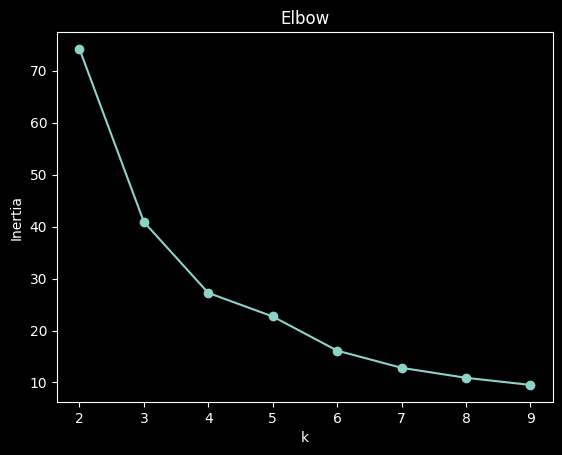

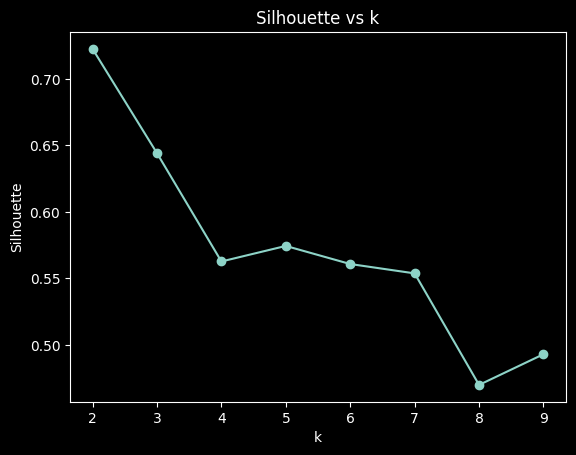

2

In [137]:
# 최적 k 찾기 (엘보우 방법)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

inertia, sils, K_range = [], [], range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    sils.append(silhouette_score(X, labels))

# Elbow
plt.plot(list(K_range), inertia, 'o-'); plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow'); plt.show()
# Silhouette
plt.plot(list(K_range), sils, 'o-'); plt.xlabel('k'); plt.ylabel('Silhouette'); plt.title('Silhouette vs k'); plt.show()

best_k = int(K_range[np.argmax(sils)])
best_k

### 🔶 모델 학습·라벨링

- 고객별 클러스터 부여, 클러스터 요약 테이블 산출

In [138]:
# 실제 클러스터링 (예: k=4 선택)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X)

In [139]:
# 클러스터 결과 요약
cluster_summary = (
    rfm.groupby('Cluster')
       .agg(Recency=('Recency','mean'),
            Frequency=('Frequency','mean'),
            Monetary=('Monetary','mean'),
            NumCustomers=('CustomerID','count'),
            Score=('Score','mean'))
)
display(cluster_summary)

,Recency,Frequency,Monetary,NumCustomers,Score
Cluster,,,,,
0,0.946830,0.025752,0.011545,2208,39.804801
1,0.482524,0.004156,0.002560,598,19.780936
2,0.775107,0.007785,0.003599,1035,31.811594
3,0.172957,0.001683,0.002009,497,7.138833


### 🔶  결과 요약·시각화·해석

(A) R/F/M 프로파일 비교(정규화 bar)

(B) 2D 투영(PCA) 산점도

(C) Rule vs Cluster 교차표(선택)

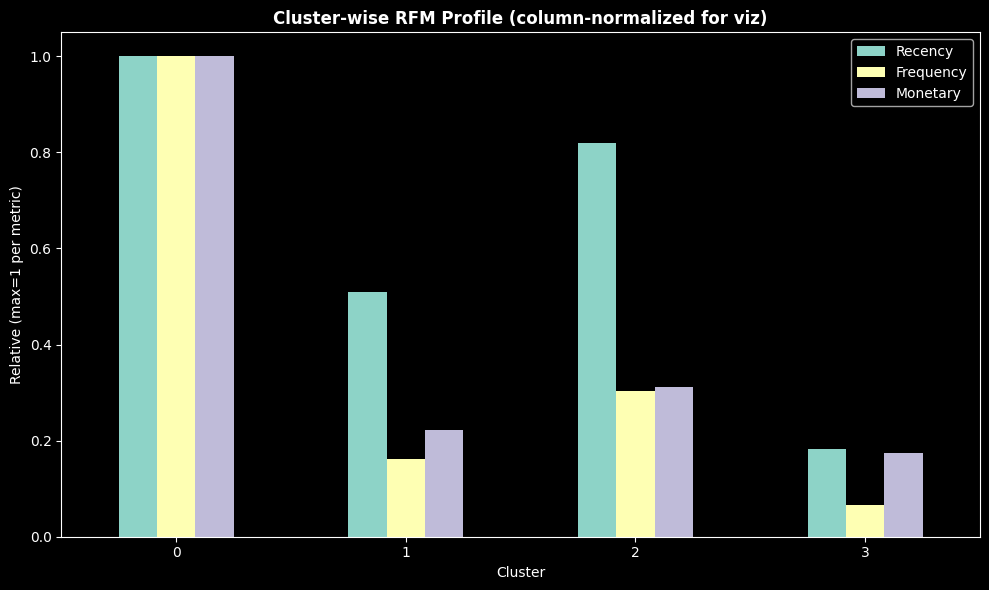

In [140]:
# Bar - 시각화 전용 정규화(각 지표별 max=1)
plot_cols = ['Recency','Frequency','Monetary']
cs_norm = cluster_summary[plot_cols] / cluster_summary[plot_cols].max(axis=0)

ax = cs_norm.plot(kind='bar', figsize=(10,6))

ax.set_title("Cluster-wise RFM Profile (column-normalized for viz)", fontweight='bold')
ax.set_ylabel("Relative (max=1 per metric)"); ax.set_xlabel("Cluster")
ax.tick_params(axis='x', rotation=0); plt.tight_layout();
plt.show()

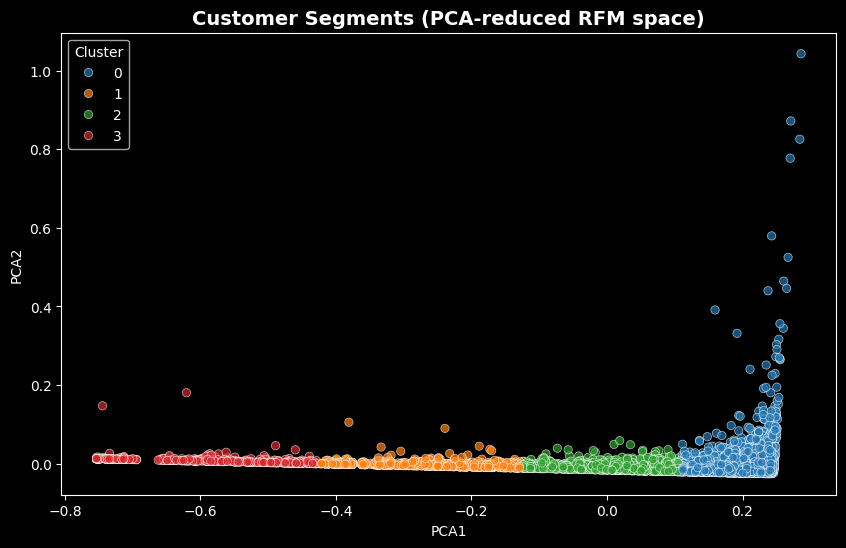

In [141]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm[['Recency','Frequency','Monetary']])

rfm['PCA1'] = rfm_pca[:,0]
rfm['PCA2'] = rfm_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("Customer Segments (PCA-reduced RFM space)", fontsize=14, fontweight='bold')
plt.show()


In [142]:
# Grade × Cluster 교차표
pd.crosstab(rfm['Grade'], rfm['Cluster'])


Cluster,0,1,2,3
Grade,,,,
01.Very Strong,13,0,0,0
02.Strong,1056,0,0,0
03.Normal,1139,329,1035,0
04.Weak,0,269,0,184
05.Very Weak,0,0,0,313


### 🔶 그래프 해석 & 인사이트

#### 1. Cluster Summary 해석
| Cluster | Recency | Frequency | Monetary | NumCustomers | Score | 해석 |
|---------|---------|-----------|----------|--------------|-------|------|
| 0 | **0.95 (가장 최근)** | 0.026 (상대적으로 높음) | 0.012 (상대적으로 높음) | 2208 | 39.8 | **핵심 활동 고객 / 충성 고객군** |
| 1 | 0.48 (중간) | 0.004 (매우 낮음) | 0.003 (매우 낮음) | 598 | 19.8 | **저관여 고객군 (활동은 했으나 구매력 낮음)** |
| 2 | 0.78 (다소 최근) | 0.008 (낮음) | 0.004 (낮음) | 1035 | 31.8 | **신규/잠재 성장 고객군** |
| 3 | **0.17 (매우 오래됨)** | 0.002 (거의 없음) | 0.002 (거의 없음) | 497 | 7.1 | **휴면/이탈 고객군** |

---

#### 2. Grade × Cluster 교차표 해석
- **Grade 01·02 (Very Strong / Strong)** → 전부 **Cluster 0**에만 분포  
  → VIP/충성 고객군으로 두 방법 모두 일치  
- **Grade 03 (Normal)** → **Cluster 0, 1, 2**로 분산  
  → 룰 기반에서는 하나로 묶였지만, 데이터 기반에서는 아래와 같이 세분화 됨  
  - Cluster 0: 충성군  
  - Cluster 1: 저관여군  
  - Cluster 2: 신규/잠재군  
- **Grade 04·05 (Weak / Very Weak)** → 주로 **Cluster 1, 3**에 몰림  
  → 데이터 기반 결과와도 유사하게 “저활동/휴면군”으로 분류  

---

#### 3. 종합 인사이트
- **Cluster 0 (충성 고객)** → 매출 기여도 높음 → 유지·VIP 관리 전략 필요  
- **Cluster 1·2 (중간층)** → 기존 Grade 03을 세분화 →  
  - Cluster 1: 저관여 → 리텐션 강화 필요  
  - Cluster 2: 신규/잠재 → 업셀링·온보딩 강화 필요  
- **Cluster 3 (휴면 고객)** → 장기간 거래 없음 → 리마인드 캠페인/휴면 관리 전략 필요  

-> 결론적으로, **RFM Grade는 큰 틀의 세분화에 유용하지만, K-means는 특히 Normal 그룹을 더 세밀하게 나누어 차별화된 전략 설계가 가능**함.

---

#### 4. 클러스터별 전략 제안
- **Cluster 0 (충성 고객)** → VIP 관리 프로그램 강화  
  - 프리미엄 멤버십, 리워드 프로그램, 장기 고객 혜택 제공  
- **Cluster 1 (저관여 고객)** → 리마인드 캠페인 필요  
  - 휴면 방지 이메일, 개인화 쿠폰, 관심 상품 추천  
- **Cluster 2 (신규·잠재 고객)** → 온보딩·첫 구매 프로모션  
  - 웰컴 쿠폰, 첫 구매/재구매 프로모션, 온보딩 프로세스 강화  
- **Cluster 3 (휴면 고객)** → 재활성화 마케팅 집중  
  - 휴면 방지 알림, 특별 할인권, 재가입 캠페인 운영  

---

### 5. 최종 정리
- **데이터 기반 세분화**로 고객을 4개 Cluster로 구분  
- **VIP 고객군(Cluster 0)** → 매출 핵심 → 유지 관리 전략 필수  
- **중간층 고객(Cluster 1·2)** → 저관여와 신규군으로 나뉨 → 각각 차별적 접근 필요  
- **휴면 고객(Cluster 3)** → 재활성화 시도 필요  
- 단순한 RFM Rule 기반 분류보다, **K-means로 Normal 그룹을 세분화함으로써 실행 가능한 전략 설계가 가능**함



## **🔊Process05**  
##**┗ 지표 기획 & 활용**  



### 🔶 데이터 통합 (merge)
- 원본 거래 데이터 + 고객 속성 (Score, Grade, Cluster) 결합
- Date를 가공해 년-월 단위로 변환 (Date_1)

In [143]:
rfm.head()

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Score,Grade,Cluster,PCA1,PCA2
0,12346.0,0.128686,150d+,0.000000,0.275443,16.0,04.Weak,3,-0.620530,0.180365
1,12347.0,0.994638,0-30d,0.028846,0.015368,42.0,02.Strong,0,0.241859,0.006051
2,12348.0,0.798928,61-90d,0.014423,0.006401,33.0,03.Normal,2,0.045638,-0.003334
3,12349.0,0.951743,0-30d,0.000000,0.006259,39.0,03.Normal,0,0.197800,-0.020436
4,12350.0,0.168901,150d+,0.000000,0.001180,7.0,05.Very Weak,3,-0.584500,0.006179


In [144]:
# 기존 Data에 고객의 등급(Grade) Data를 left join
df = pd.merge(df, rfm[['CustomerID','Score','Grade','Cluster']], how='left', on='CustomerID')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Score,Grade,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,7.0,05.Very Weak,3
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,7.0,05.Very Weak,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3


In [145]:
# 지표 기획에 앞서, 년월만 새로운 col로 정의 (※ 월별 분석을 하기위한 준비과정)
df['Date_1'] = df["Date"].dt.strftime("%Y-%m")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Score,Grade,Cluster,Date_1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,7.0,05.Very Weak,3,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,7.0,05.Very Weak,3,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3,2010-12


### 🔶 지표 기획


#### 🔷 기초 월별 지표 (Baseline Usage Trends)
- 월 별 이용 고객 현황
- 월 별 이용 건수
- 월 별 이용 국가

#### · 월 별 이용 고객 현황
---

In [146]:
# 월별 이용 고객 현황 - 날짜별 고객 방문 수 변화
df_cus = df.groupby('Date_1',as_index=False)['CustomerID'].nunique()
df_cus.tail(5)

,Date_1,CustomerID
8,2011-08,935
9,2011-09,1266
10,2011-10,1364
11,2011-11,1664
12,2011-12,615


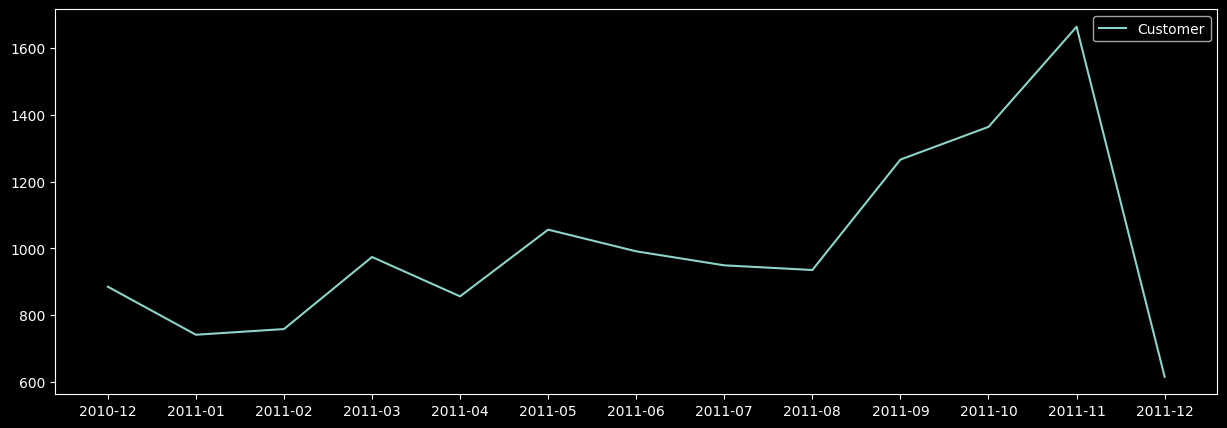

In [174]:
# 2010.12 런칭이후 사용자 수가 증가하고 2011.11월 Peak를 달성했으나 다시 대폭 하락함

# 12월은 9일까지만 분석했기 때문에 11월까지만 보기
# 9,10,11월 빠르게 성장한 것 확인 가능
plt.style.use(['dark_background'])
plt.plot(df_cus['Date_1'], df_cus['CustomerID'], label='Customer');
plt.legend();
plt.gcf().set_size_inches(15, 5)

#### · 월 별 이용 건수
---

In [148]:
# 월별 이용 건수 - 월별 발생한 주문 수
# 위 지표와 비슷한 지표
df_cnt = df.groupby('Date_1',as_index=False)['InvoiceNo'].nunique()
df_cnt.head(5)

,Date_1,InvoiceNo
0,2010-12,1400
1,2011-01,987
2,2011-02,997
3,2011-03,1321
4,2011-04,1149


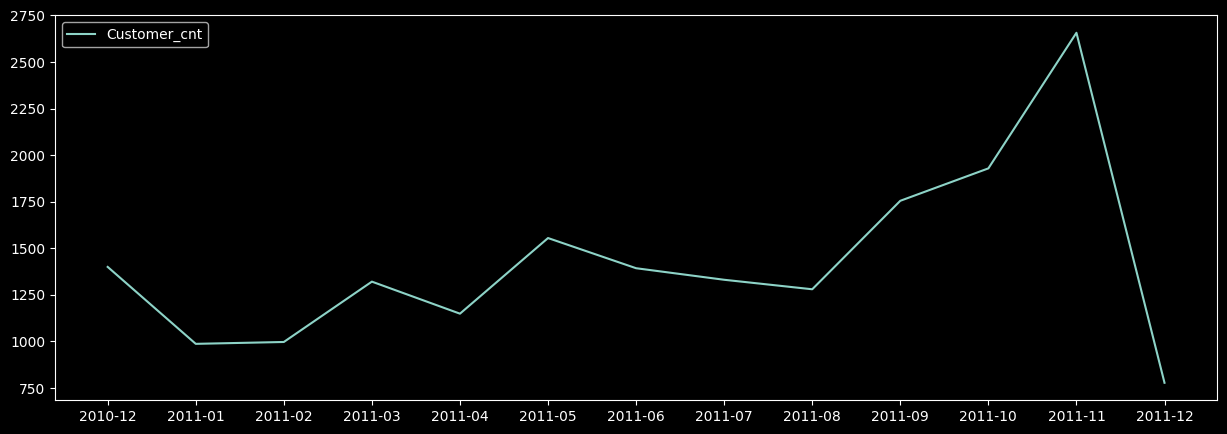

In [175]:
# 월별 이용 고객수와 비슷한 양상
plt.plot(df_cnt['Date_1'], df_cnt['InvoiceNo'], label='Customer_cnt');
plt.legend();
plt.gcf().set_size_inches(15, 5)

#### · 월 별 이용 국가
---

In [150]:
df['Country'].nunique()

37

In [151]:
# 월별 이용 국가
df_country = df.groupby('Date_1',as_index=False)['Country'].nunique()
df_country.head(5)

,Date_1,Country
0,2010-12,22
1,2011-01,20
2,2011-02,24
3,2011-03,22
4,2011-04,24


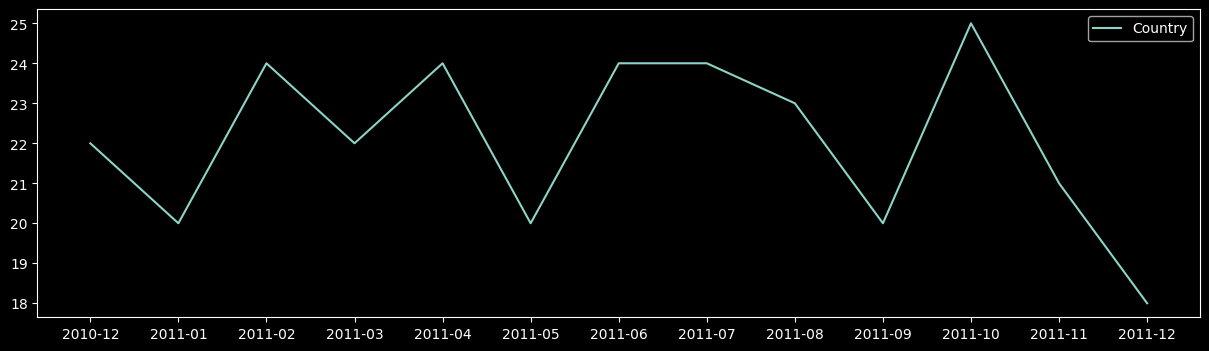

In [176]:
plt.plot(df_country['Date_1'], df_country['Country'], label='Country');
plt.legend();
plt.gcf().set_size_inches(15, 4)

In [153]:
# 가장 충성도가 높은 이용 나라
pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False)).head(10)

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Portugal,57
Australia,57


#### 🔷 세분화 기반 지표 (Segmentation-based Metrics)

- 월 별 Grade 이용 비중
- 월 별 Cluster 비중 (stacked bar)

#### · 월 별 Grade 이용 비중
---

In [154]:
df_grade = df.groupby(['Date_1', 'Grade'],as_index=False)['CustomerID'].nunique()
df_grade.head(5)


,Date_1,Grade,CustomerID
0,2010-12,01.Very Strong,11
1,2010-12,02.Strong,397
2,2010-12,03.Normal,291
3,2010-12,04.Weak,42
4,2010-12,05.Very Weak,144


In [155]:
# 날짜(Date_1)별 · 등급(Grade)별 고객 수를 교차표 형태로 집계
df_pivot = pd.pivot_table(
    df_grade,                 # 피벗할 데이터프레임
    index='Date_1',           # 행 인덱스: 날짜
    columns='Grade',          # 열 인덱스: 고객 등급
    values='CustomerID',      # 데이터: 고객 ID (count 집계 기본 적용)
)

# NaN(값 없음)을 0으로 채워서 집계 누락 방지
df_pivot.fillna(0, inplace=True)

# 날짜별 총 고객 수(total) 계산 (5개 등급을 모두 합산)
df_pivot['total'] = (
    df_pivot['01.Very Strong']
  + df_pivot['02.Strong']
  + df_pivot['03.Normal']
  + df_pivot['04.Weak']
  + df_pivot['05.Very Weak']
)

df_pivot

Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak,total
Date_1,,,,,,
2010-12,11.0,397.0,291.0,42.0,144.0,885.0
2011-01,11.0,334.0,259.0,34.0,103.0,741.0
2011-02,11.0,318.0,286.0,43.0,100.0,758.0
2011-03,12.0,391.0,378.0,193.0,0.0,974.0
2011-04,12.0,360.0,338.0,146.0,0.0,856.0
2011-05,13.0,449.0,453.0,141.0,0.0,1056.0
2011-06,12.0,424.0,555.0,0.0,0.0,991.0
2011-07,12.0,421.0,516.0,0.0,0.0,949.0
2011-08,12.0,424.0,499.0,0.0,0.0,935.0


In [156]:
# 각 열 값을 total 대비 비율로 변환 (정규화)
df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

# total 컬럼은 기준으로만 사용했으므로 제거
df_pivot.drop(['total'], axis=1, inplace=True)
df_pivot


Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak
Date_1,,,,,
2010-12,0.012429,0.448588,0.328814,0.047458,0.162712
2011-01,0.014845,0.450742,0.349528,0.045884,0.139001
2011-02,0.014512,0.419525,0.377309,0.056728,0.131926
2011-03,0.012320,0.401437,0.388090,0.198152,0.000000
2011-04,0.014019,0.420561,0.394860,0.170561,0.000000
2011-05,0.012311,0.425189,0.428977,0.133523,0.000000
2011-06,0.012109,0.427851,0.560040,0.000000,0.000000
2011-07,0.012645,0.443625,0.543730,0.000000,0.000000
2011-08,0.012834,0.453476,0.533690,0.000000,0.000000


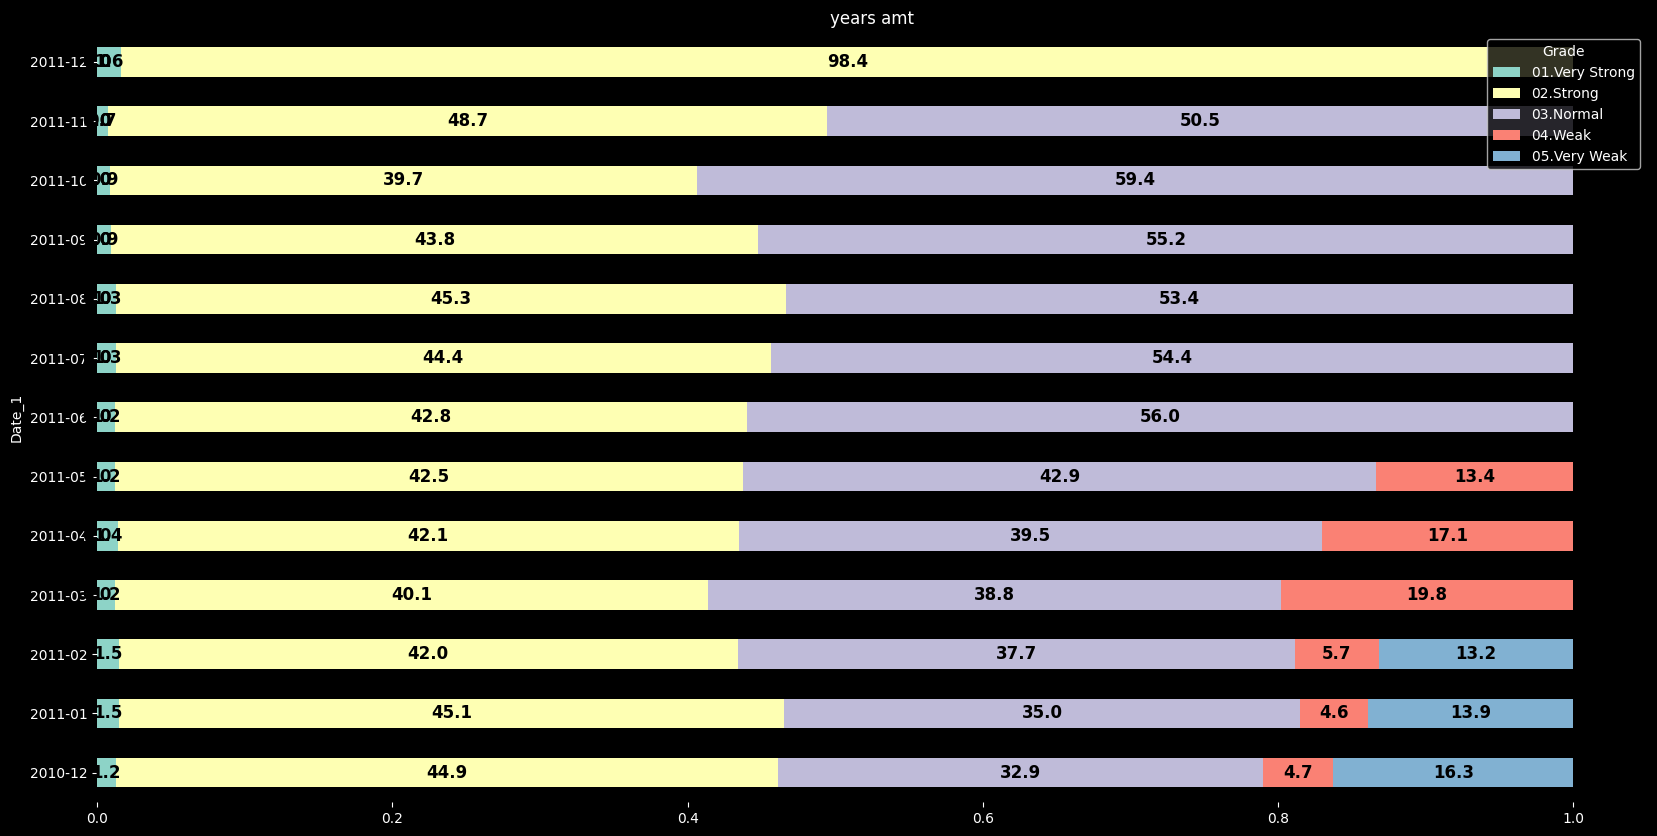

In [173]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['dark_background'])

# 날짜별 등급별 고객 수를 누적 가로 막대 그래프로 시각화
ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);

# 각 막대 내부에 비율(%) 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='black', fontsize=12, fontweight='bold');

plt.box(False) #그래프 테두리 제거
plt.gcf().set_size_inches(20, 10)
plt.show()

#### · 월별 Cluster 비중 (stacked bar)
---

In [158]:
# 월별 Cluster별 고객 수 집계
df_cluster = df.groupby(['Date_1','Cluster'], as_index=False)['CustomerID'].nunique()

In [159]:
# Pivot 테이블 (행=월, 열=Cluster, 값=고객 수)
pivot_cluster = pd.pivot_table(
    df_cluster,
    index='Date_1',
    columns='Cluster',
    values='CustomerID'
).fillna(0)

In [160]:
# 비율화 (각 달별 total 대비)
pivot_cluster = pivot_cluster.div(pivot_cluster.sum(axis=1), axis=0)
pivot_cluster

Cluster,0,1,2,3
Date_1,,,,
2010-12,0.613559,0.077966,0.125424,0.183051
2011-01,0.614035,0.078273,0.155196,0.152497
2011-02,0.589710,0.068602,0.180739,0.160950
2011-03,0.585216,0.081109,0.162218,0.171458
2011-04,0.596963,0.219626,0.174065,0.009346
2011-05,0.614583,0.203598,0.181818,0.000000
2011-06,0.632694,0.199798,0.167508,0.000000
2011-07,0.650158,0.129610,0.220232,0.000000
2011-08,0.663102,0.000000,0.336898,0.000000


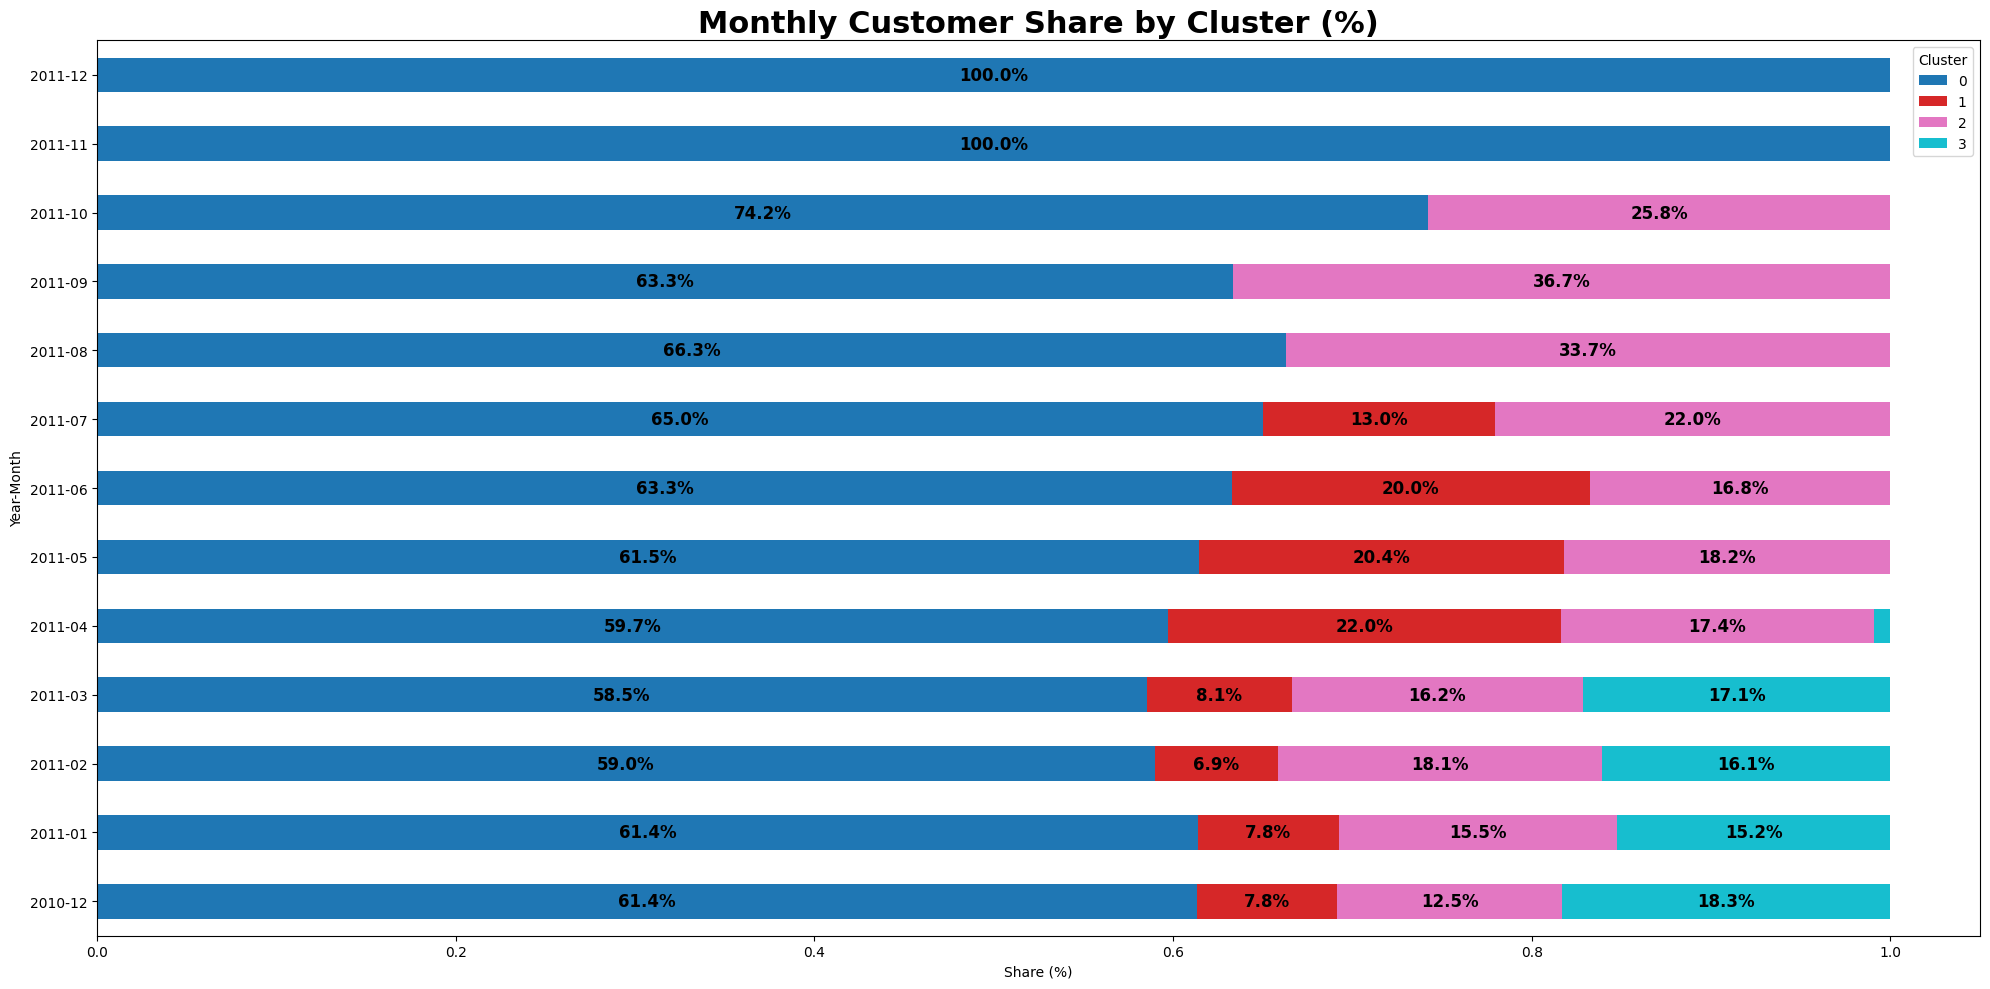

In [161]:
# Stacked Bar 시각화
plt.style.use('default')
ax = pivot_cluster.plot(kind='barh', stacked=True, figsize=(20, 10), cmap="tab10")

ax.set_title("Monthly Customer Share by Cluster (%)", fontsize=22, fontweight='bold')
ax.set_xlabel("Share (%)")
ax.set_ylabel("Year-Month")

# 퍼센트 라벨 표시 (3% 이상만)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0.03:
        ax.annotate(f"{width*100:.1f}%",
                    (left + width/2, bottom + height/2),
                    ha='center', va='center',
                    color='black', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### · 해석 & 인사이트

#### 1. 월별 Grade 이용 비중

- 초기(2010-12 ~ 2011-02): 모든 Grade가 균등(0.2씩) → 고객 특성이 뚜렷하지 않음  
- 2011-03 ~ 2011-05: Weak/Very Weak 비중 감소, Strong 이상 고객 비중 유지  
- 2011-06 이후: 상위 Grade 중심으로 단순화, 2011-12에는 Very Strong/Strong만 존재  
- **인사이트**: 시간이 지날수록 약한 고객층은 이탈하고, 충성도가 높은 고객 비중이 강화됨  

<br>

#### 2. 월별 Cluster 이용 비중


- Cluster 0: 꾸준히 가장 큰 비중(60% 이상) → 2011-10 이후 74%, 말기엔 100%  
- Cluster 1·2: 초반(20% 수준) 존재했으나 점차 축소 → 2011-08 이후 소멸  
- Cluster 3: 초반(10~18%) 존재했으나 2011-05 이후 완전히 사라짐  
- **인사이트**: 시간이 갈수록 다양한 군집이 사라지고, 주력 고객군(Cluster 0)으로 집중됨

<br>

#### 3. 종합 시사점 및 전략 도출

##### 종합 인사이트
- **Grade 분석**: 약한 고객층 감소, 충성 고객 중심 구조로 변화  
- **Cluster 분석**: 다양한 군집이 점차 축소되고, 주력 고객군으로 집중  

##### 시사점
- **긍정적**: 고객 기반의 질적 향상, 충성 고객 확보 및 리텐션 강화  
- **리스크**: 특정 고객군(Cluster 0, 상위 Grade)에 과도하게 의존 → 고객층 다양성 약화 가능성  

##### 전략 제언
1. **충성 고객 Upselling/CRM 강화**: 핵심 고객의 구매력·재방문율 극대화  
2. **다양성 확보**: 사라진 중간 군집을 대체할 신규 고객 세그먼트 발굴 필요  
3. **리스크 관리**: 특정 소수 집단 의존도를 낮추기 위한 다변화 전략 (상품 포트폴리오, 채널 확장 등)  




####  🔷 Cohort 분석 (잔존율 Heatmap)

- 고객별 **첫 구매월(CohortMonth)** 추출  
- 첫 구매 이후 **경과 개월(CohortIndex)** 계산  
- Cohort별 기간별 **고객 수 집계**  
- **잔존율(첫 달 대비 비율)** 산출  
- Heatmap으로 **리텐션 패턴 시각화**

In [162]:
# Cohort Month (첫 구매 월)
df['InvoiceMonth'] = df['Date'].dt.to_period('M')
df['CohortMonth']  = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [163]:
# Cohort Index (첫 구매월 이후 경과 개월 수)
def get_month_diff(d1, d2):
    return (d1.year - d2.year) * 12 + (d1.month - d2.month)

df['CohortIndex'] = df.apply(lambda row: get_month_diff(row['InvoiceMonth'].to_timestamp(),
                                                       row['CohortMonth'].to_timestamp()), axis=1)

In [164]:
# Cohort별 고객 수 집계
cohort_data  = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
# Retention Rate (잔존율)

cohort_size = cohort_pivot.iloc[:,0] # 각 Cohort(행)의 첫 달 고객 수 (0번째 열 = 첫 구매 당시 고객 수)
retention   = cohort_pivot.divide(cohort_size, axis=0) # 각 행의 값을 첫 달 고객 수로 나눔

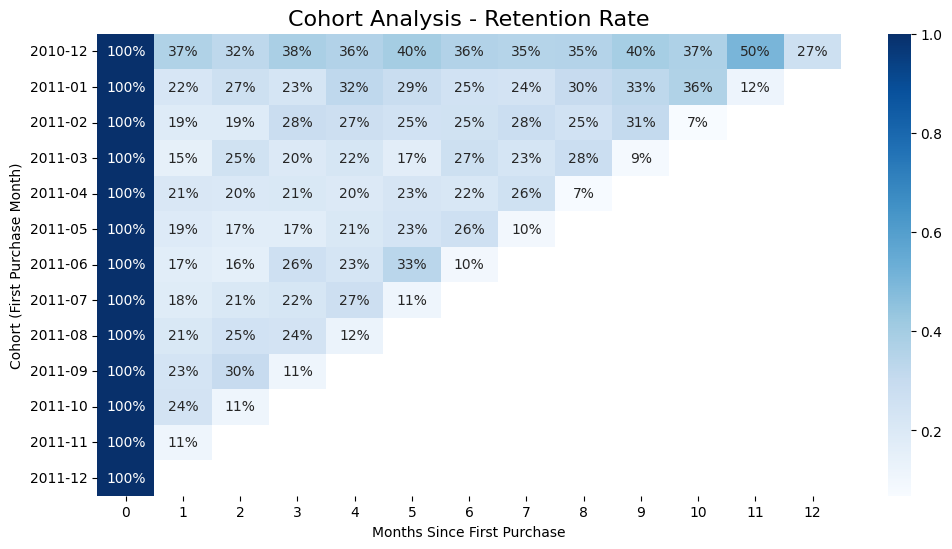

In [166]:
# 시각화
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title('Cohort Analysis - Retention Rate', fontsize=16)
plt.ylabel('Cohort (First Purchase Month)')
plt.xlabel('Months Since First Purchase')
plt.show()


#### · 해석 & 인사이트

##### 1. 코호트 테이블 결과
- 행(CohortMonth): 특정 월에 첫 구매한 고객 집단
- 열(CohortIndex): 첫 구매 이후 경과 개월 (0=첫 구매월, 1=다음 달, …)
- 값: 해당 Cohort에서 그 달에도 구매한 고객 수

##### 2. 그래프 해석
  (1) **초기 Cohort(2010-12)**  
   - 첫 달 885명 → 1개월차 324명(약 36%)  
   - 이후에도 수백 명 단위 고객이 잔존 → 대규모 Cohort의 특성 반영  

  (2) **2011년 Cohort들**  
   - 2011-01 Cohort: 첫 달 417명 → 2개월차 111명(약 27%) → 5개월차 120명으로 소폭 반등  
   - 2011-03 Cohort: 첫 달 452명 → 1개월차 68명(15%) → 2개월차 114명으로 재활성화 패턴  

  (3) **공통 패턴**  
   - 첫 달 대비 급격한 이탈(리텐션 초반 급락) 발생  
   - 일부 Cohort는 2~4개월차에 반등 → 특정 시기 이벤트/프로모션 효과 가능성  
   - Cohort별 잔존 고객 수 격차가 뚜렷 → 초기 유입 특성 차이 존재  

##### 3. 인사이트
- **Retention 초반 급락**: 첫 달 고객 이탈 방지 전략 필요 (온보딩 강화, 첫 구매 이후 재구매 유도)  
- **재활성화 패턴 발견**: 특정 Cohort에서 나타난 반등 요인을 분석해 다른 Cohort에도 적용 필요  
- **좋은 Cohort 특성 활용**: 잔존율이 높았던 Cohort의 유입 채널·프로모션을 재현하는 전략 필요
---


### 📌 최종 인사이트 및 전략 도출  

#### 1. 종합 인사이트  
- **RFM 분석**  
  - 고객은 **최근 구매자(Recency 짧음)**와 **장기 미구매 고객**으로 양극화  
  - 매출은 소수의 **고액/충성 고객군**에 크게 의존하는 전형적인 **파레토(20:80) 구조** 확인  

- **K-means 군집화**  
  - 기존 Rule-based 등급(Grade) 대비, 고객군을 더 세밀하게 분류  
  - 특히 `Normal` 등급을 **충성/저관여/신규**로 세분화 → 차별화 전략 수립 가능  
  - 최종 군집 구조:  
    - Cluster 0 → **충성 고객군** (가장 최근·활동적)  
    - Cluster 1 → **저관여 고객군** (활동 경험은 있으나 낮은 빈도·지출)  
    - Cluster 2 → **신규·잠재 고객군** (최근 유입, 성장 가능성)  
    - Cluster 3 → **휴면/이탈 고객군** (오랜 기간 미구매)  

- **Cohort 분석**  
  - 대부분 고객은 **첫 달 이후 급격히 이탈** → 온보딩·재구매 유도 부족  
  - 일부 Cohort에서 **2~4개월차 재활성화** 확인 → 특정 시기 프로모션/이벤트 효과 가능  
  - Cohort 간 잔존율 차이가 뚜렷 → 유입 채널별 특성 및 성과 분석 필요  

---

#### 2. 전략 제안  

- **Cluster 0 (충성 고객군)**  
  → 매출 기여도 가장 높음, 장기 관계 유지가 핵심  
  - 프리미엄 멤버십·VIP 리워드 제공  
  - 개인화 추천(추천 상품·혜택) 강화  

- **Cluster 1 (저관여 고객군)**  
  → 활동 경험 있으나 구매력이 낮음  
  - 리마인드 캠페인 (이메일, 앱 푸시)  
  - 쿠폰·소액 프로모션으로 재방문 유도  

- **Cluster 2 (신규·잠재 고객군)**  
  → 성장 가능성이 크며, 온보딩이 중요  
  - 첫 구매/재구매 프로모션 (웰컴 쿠폰, 무료배송)  
  - 초기 단계 맞춤형 교육·가이드 제공  

- **Cluster 3 (휴면/이탈 고객군)**  
  → 장기간 거래 없음, 회복 어려움  
  - 재활성화 마케팅 (스페셜 할인, 리마인드 알림)  
  - 일정 기간 반응 없으면 비용 최소화를 위해 관리 효율화  

| Cluster | 특성            | 전략             |
| ------- | ------------- | -------------- |
| 0 (충성)  | 최근·활동적, 매출 핵심 | VIP 관리, Upsell |
| 1 (저관여) | 낮은 빈도·지출      | 리마인드 캠페인       |
| 2 (신규)  | 최근 유입, 성장 가능성 | 온보딩·첫구매 프로모션   |
| 3 (휴면)  | 장기 미구매        | 재활성화·선택적 관리    |


---

#### 3. 시사점  
- **긍정적 측면**: 충성 고객 기반이 탄탄하며, 이들이 전체 매출의 절반 이상을 견인  
- **리스크**: 고객군이 점차 **소수 VIP 중심**으로 집중 → 다변성 부족  
- **전략적 과제**:  
  1. 충성 고객 리텐션 강화 (VIP 관리 핵심)  
  2. 신규·저관여 고객의 활성화를 통해 **모수 확대**  
  3. 휴면 고객은 **비용 대비 효율**을 고려해 선택적 관리  

▶︎ 결론적으로, 본 분석은 **충성 고객 리텐션 + 신규 고객 온보딩**을 핵심 축으로 한 CRM 전략 설계가 필요함을 보여줍니다.  
